해설/정리 : https://road-slug-941.notion.site/NLP-f830fa0dd5144e208c6f8643667dcbee  
데이터셋 출처 : https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset

In [2]:
# upload the kaggle token
from google.colab import files
kaggle_token = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
# download kaggle datasets by kaggle API
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d zusmani/pakistans-largest-ecommerce-dataset
!unzip -q /content/pakistans-largest-ecommerce-dataset.zip

 36% 5.00M/13.8M [00:00<00:00, 29.4MB/s]
100% 13.8M/13.8M [00:00<00:00, 67.9MB/s]


In [4]:
# install libraries needed
!pip install datasets
!pip install category_encoders
!pip install transformers
# !pip install torchtext
# !pip install torchtext --upgrade
# !pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 452 kB 1.7 MB/s 
     |████████████████████████████████| 212 kB 9.2 MB/s 
     |████████████████████████████████| 132 kB 3.7 MB/s 
     |████████████████████████████████| 182 kB 8.4 MB/s 
     |████████████████████████████████| 127 kB 9.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 724 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 6.4 MB/s 
     |████████████████████████████████| 7.6 MB 7.6 MB/s 


In [5]:
# To EDA
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [53]:
# Data importing
df_origin = pd.read_csv('/content/Pakistan Largest Ecommerce Dataset.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_origin.shape

(1048575, 26)

In [54]:
# Drop NaN
df2 = df_origin.dropna(subset=['sku', 'category_name_1']) #결측값 드랍 (문제 형성의 필수조건이라 drop)

In [ ]:
df2.shape

(584340, 26)

In [55]:
# It is too big to progress in colab
from sklearn.model_selection import train_test_split
df2, df = train_test_split(df2,
                              test_size=0.04,
                              stratify=df2['category_name_1'],
                              random_state=42)
df.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

In [27]:
df2.shape

(560966, 26)

In [28]:
df.shape

(23374, 26)

In [56]:
df = df[['sku', 'price', 'category_name_1']] # hackon-like shape
df.rename(columns={'category_name_1':'label'}, inplace=True)

df2 = df2[['sku', 'price', 'category_name_1']] # hackon-like shape
df2.rename(columns={'category_name_1':'label'}, inplace=True)

df.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,sku,price,label
0,HALSHO59F869373FFAC,199.0,Home & Living
1,DOH_DOH-27-L,380.0,Men's Fashion
2,OTHPCB5ABB2067D5536,1000.0,Others
3,BT_BT-217,199.0,Mobiles & Tablets
4,ART_PKOO-0716-L,399.0,Men's Fashion


In [ ]:
# distriution of Target
df['label'].nunique(), df['label'].unique()

(16, array(["Women's Fashion", 'Computing', 'Mobiles & Tablets',
        'Beauty & Grooming', 'Superstore', "Men's Fashion", '\\N',
        'Home & Living', 'Others', 'Soghaat', 'Kids & Baby', 'Appliances',
        'Entertainment', 'Health & Sports', 'School & Education', 'Books'],
       dtype=object))

[]

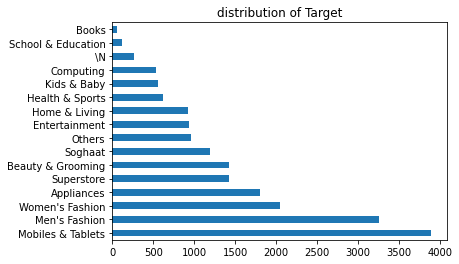

In [ ]:
# Visualize the Target
df['label'].value_counts().plot.barh()
plt.title('distribution of Target')
plt.plot()

In [ ]:
# check the null
df.isnull().sum()

sku      0
price    0
label    0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


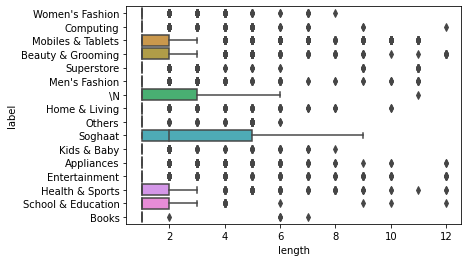

In [ ]:
# visualize the length by target
df['length'] = df['sku'].str.split().apply(len)
sns.boxplot('length',
            'label',
            data=df
            )
plt.show()

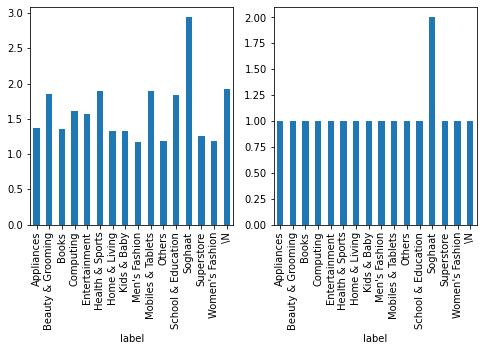

In [ ]:
# mean, median of length
f, ax = plt.subplots(1, 2, figsize=(8, 4))
df.groupby('label')['length'].mean().plot.bar(ax=ax[0])
df.groupby('label')['length'].median().plot.bar(ax=ax[1])
plt.show()

In [ ]:
## prepare the datasets
df.drop(columns=['length'], inplace=True)

In [57]:
# train_test_split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,
                              test_size=0.15,
                              stratify=df['label'],
                              random_state=42)

In [ ]:
train['label'].nunique(), test['label'].nunique()

(16, 16)

In [60]:
from category_encoders import OrdinalEncoder
ord_enc = OrdinalEncoder(cols=['label'])
train = ord_enc.fit_transform(train)
test = ord_enc.transform(test)
test_df = ord_enc.fit_transform(df2)

In [61]:
test

,sku,price,label
17423,Apple iPhone 6 (64GB) Silver,84375.0,1
14760,SEH59F8263CD44C1,2599.0,8
8403,LS_5060337500524,175.0,8
8921,BAGKEM5AB0ADF40A65C,490.0,7
18954,WOFJUN59BAF8A1AEA1E,1791.0,10
...,...,...,...
12840,head_287006-NV,1290.0,5
22145,HALSHO59F82EA23FB6F,239.0,11
10014,cr_MUZAFTI IRANI (500GM),185.0,2
17506,APPPHI59FADAE20C078,3199.0,4


In [63]:
# convert pd.DataFrame to datasetDict
import datasets

train_dataset = datasets.Dataset.from_dict(train)
test_dataset = datasets.Dataset.from_dict(test)
test_df_dataset = datasets.Dataset.from_dict(test_df)
df_dataset = datasets.DatasetDict({"train":train_dataset,"test":test_dataset})
test_df_dataset = datasets.DatasetDict({"test":test_df_dataset})

In [ ]:
df_dataset

DatasetDict({
    train: Dataset({
        features: ['sku', 'price', 'label'],
        num_rows: 17000
    })
    test: Dataset({
        features: ['sku', 'price', 'label'],
        num_rows: 3000
    })
})

In [32]:
test_df_dataset

DatasetDict({
    test: Dataset({
        features: ['sku', 'price', 'label'],
        num_rows: 560966
    })
})

In [ ]:
df_dataset['train']['sku'][514]

'GG_RTW004-Large'

In [33]:
# for modeling
import torch
import torch.nn as nn

In [16]:
# pretrained model import
from transformers import AutoModel

# declare the name of pretrained model
model_ckpt = 'distilbert-base-uncased'

# (automatically) import tokenizer of pretrained model
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [17]:
# func definition for tokenizing
def tokenize(batch):
	return tokenizer(batch['sku'], padding=True, truncation=True)

In [ ]:
## tokenizing

# sample
print(tokenize(df_dataset['train'][1:2]))

{'input_ids': [[101, 27178, 22269, 27421, 2629, 7875, 19481, 2487, 4402, 2050, 16086, 10790, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [64]:
# tokenizing all
dataset_enc = df_dataset.map(tokenize, batched=True, batch_size=None)
dataset_enc2 = test_df_dataset.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [35]:
# check the result
print(dataset_enc['train'].column_names)
print(dataset_enc2['test'].column_names)

['sku', 'price', 'label', 'input_ids', 'attention_mask']
['sku', 'price', 'label', 'input_ids', 'attention_mask']


In [ ]:
## modeling processes
print(tokenizer(dataset_enc['train']['sku'][1:2]))

{'input_ids': [[101, 27178, 22269, 27421, 2629, 7875, 19481, 2487, 4402, 2050, 16086, 10790, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [ ]:
# dataset_enc = dataset_enc.remove_columns(['sku'])

In [ ]:
dataset_enc

DatasetDict({
    train: Dataset({
        features: ['sku', 'price', 'label', 'input_ids', 'attention_mask'],
        num_rows: 17000
    })
    test: Dataset({
        features: ['sku', 'price', 'label', 'input_ids', 'attention_mask'],
        num_rows: 3000
    })
})

In [67]:
# func def for hidden_states
def extract_hidden_states(batch):
	inputs = {k:v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
	with torch.no_grad():
		last_hidden_state = model(**inputs).last_hidden_state

	return {'hidden_state': last_hidden_state[:, 0].cpu().numpy()}

In [20]:
# set the model and device
device = torch.device('cuda' if torch.cuda.is_available() else'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)  

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [68]:
# converting the dataset to Tensor for using dataset to inputs
dataset_enc.set_format('torch', columns=['label', 'price', 'input_ids', 'attention_mask'])
dataset_enc2.set_format('torch', columns=['label', 'price', 'input_ids', 'attention_mask'])

In [69]:
# get hidden states
dataset_hidden = dataset_enc.map(extract_hidden_states, batched=True)
dataset_hidden2 = dataset_enc2.map(extract_hidden_states, batched=True)

  0%|          | 0/20 [00:00<?, ?ba/s]

AttributeError: ignored

In [ ]:
dataset_hidden['train'].column_names

['sku', 'price', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [39]:
X_train = np.array(dataset_hidden['train']['hidden_state'])
X_test = np.array(dataset_hidden['test']['hidden_state'])
X_test_df = np.array(dataset_hidden2['test']['hidden_state'])

y_train = np.array(dataset_hidden['train']['label'])
y_test = np.array(dataset_hidden['test']['label'])
y_test_df = np.array(dataset_hidden2['test']['label'])

In [40]:
# X(hidden state), y(labels) are numberical data either so I try LogisticRegression model
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=300)
lr_clf.fit(X_train, y_train)
print("테스트 결과 : ", lr_clf.score(X_test, y_test))
print("전체 데이터셋 테스트 결과 : ", lr_clf.score(X_test_df, y_test_df))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


테스트 결과 :  0.877
전체 데이터셋 테스트 결과 :  0.0


In [41]:
#almost randomized model
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
print("테스트 결과 : ", dummy_clf.score(X_test, y_test))
print("전체 데이터셋 테스트 결과 : ", dummy_clf.score(X_test_df, y_test_df))

테스트 결과 :  0.195
전체 데이터셋 테스트 결과 :  0.0


In [ ]:
## hyperparameters tunning

In [42]:
# pretrained model import for setting the Trainer
from transformers import AutoModelForSequenceClassification

num_labels = 17
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))
## It was supposed to be 16, but there was an error when it was 16. So I put 17, it works. I don't know why.

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'classifier.w

In [43]:
# setting the score for setting the Trainer

from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
	labels = pred.label_ids
	preds = pred.predictions.argmax(-1)
	f1 = f1_score(labels, preds, average='weighted')
	acc = accuracy_score(labels, preds)
	return {'accuracy':acc, 'f1':f1}

In [ ]:
## Train

In [44]:
# TrainingArguments definition for Trainer
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(dataset_enc['train']) // batch_size
model_name = f'{model_ckpt}-finetuned-emotion'
training_args = TrainingArguments(output_dir=model_name,
																	num_train_epochs=5,
																	learning_rate=2e-5,
																	per_device_train_batch_size=batch_size,
																	per_device_eval_batch_size=batch_size,
																	weight_decay=0.01,
																	evaluation_strategy='epoch',
																	disable_tqdm=False,
																	logging_steps=logging_steps,
																	push_to_hub=False,
																	save_strategy='epoch',
																	load_best_model_at_end=True,
																	log_level='error')

In [45]:
# Trainer setting, train
from transformers import Trainer
from transformers import DataCollatorForTokenClassification

trainer = Trainer(model=model,
                  args=training_args,
                  compute_metrics=compute_metrics,
									train_dataset=dataset_enc['train'],
									eval_dataset=dataset_enc['test'],
									tokenizer=tokenizer
                  )

trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.278900,0.502656,0.877000,0.866940
2,0.397900,0.273520,0.938000,0.936647
3,0.235600,0.214573,0.948000,0.947361
4,0.165900,0.188590,0.955000,0.954635
5,0.135500,0.181896,0.955333,0.955049


TrainOutput(global_step=1330, training_loss=0.44165226776797073, metrics={'train_runtime': 261.0703, 'train_samples_per_second': 325.583, 'train_steps_per_second': 5.094, 'total_flos': 615931143240000.0, 'train_loss': 0.44165226776797073, 'epoch': 5.0})

In [46]:
print(compute_metrics(trainer.predict(dataset_enc['test'])))

{'accuracy': 0.9553333333333334, 'f1': 0.9550487269793907}


In [70]:
print(compute_metrics(trainer.predict(dataset_enc2['test'])))

{'accuracy': 0.05597308927813807, 'f1': 0.055139623004625965}
